# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: [Matt Hanson](https://github.com/matthewellishanson)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import spacytextblob
import numpy as np
import html5lib
import pickle

# write a function to scrape the html of the url and pickle it
def scrape_and_pickle(url, filename):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html5lib')
    with open(filename, 'wb') as file:
        pickle.dump(soup, file)
scrape_and_pickle('https://www.theringer.com/2025/06/25/nba/cooper-flagg-maine-nba-draft', 'cooperflagg_theringer.pkl')

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
import pickle
import spacy
from spacy.language import Language
from spacy.tokens import Doc
from textblob import TextBlob

# Manually define the extensions (what SpacyTextBlob usually does under the hood)
Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity, force=True)
Doc.set_extension("subjectivity", getter=lambda doc: TextBlob(doc.text).sentiment.subjectivity, force=True)

# Define the pipeline component manually
@Language.component("spacytextblob_manual")
def spacytextblob_manual(doc):
    return doc

# Load model and add our manual component
nlp = spacy.load("en_core_web_sm")
if "spacytextblob_manual" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob_manual", last=True)

# Read the pickled BeautifulSoup HTML object
def read_pickled_html(filename):
    with open(filename, 'rb') as file:
        soup = pickle.load(file)
    return soup

# Extract text from the BeautifulSoup object
def extract_text(soup):
    return soup.get_text()

# Analyze sentiment using TextBlob via spaCy extension
def analyze_sentiment(text):
    doc = nlp(text)
    return doc._.polarity, doc._.subjectivity

# Run it
soup = read_pickled_html('cooperflagg_theringer.pkl')
text = extract_text(soup)
sentiment = analyze_sentiment(text)
print(f"Polarity: {sentiment[0]}, Subjectivity: {sentiment[1]}")

Polarity: -0.25422942657328, Subjectivity: 0.6988888784344831


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:
from collections import Counter

# Process the article text with the trained spaCy pipeline
doc = nlp(text)

# Filter out punctuation, spaces, and stop words, then convert tokens to lower case
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

print("5 Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

5 Most Common Tokens:
Token: 'flagg', Frequency: 148
Token: 'nba', Frequency: 107
Token: 'cooper', Frequency: 89
Token: 'maine', Frequency: 76
Token: 'draft', Frequency: 72


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
# Process the article text with the trained spaCy pipeline
doc = nlp(text)

# filter out punctuation, spaces, and stop words, then convert tokens to lower case
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)
print("\n5 Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


5 Most Common Lemmas:
Lemma: 'flagg', Frequency: 148
Lemma: 'nba', Frequency: 107
Lemma: 'cooper', Frequency: 89
Lemma: 'maine', Frequency: 76
Lemma: 'draft', Frequency: 72


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


Sentence Scores:
Sentence: 'The Maine, the Myth, and the Legend of Cooper Flagg - The Ringer
                                        :root {
                                        --font-gt-america: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'gtAmerica_ce3cd8', '__gtAmerica_Fallback_ce3cd8';
                                        --font-bradford: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'bradford_82a743', '__bradford_Fallback_82a743';
                                        --font-flood: "flood-std", sans-serif;
                                        --font-gt-america-expanded: '__gtAmericaExpanded_999689', '__gtAmericaExpanded_Fallback_999689';
                                        }', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'DiscoveranythingDiscoveranythingVideosPodcastsThe LatestThe LatestFantasy Football RankingsFantasy Football RankingsNBANBANFLNFLThe Fantastic FourThe Fantastic FourTVTVMoviesMoviesMLBMLBEventsEventsThe Streaming GuideThe Streaming GuideSocc

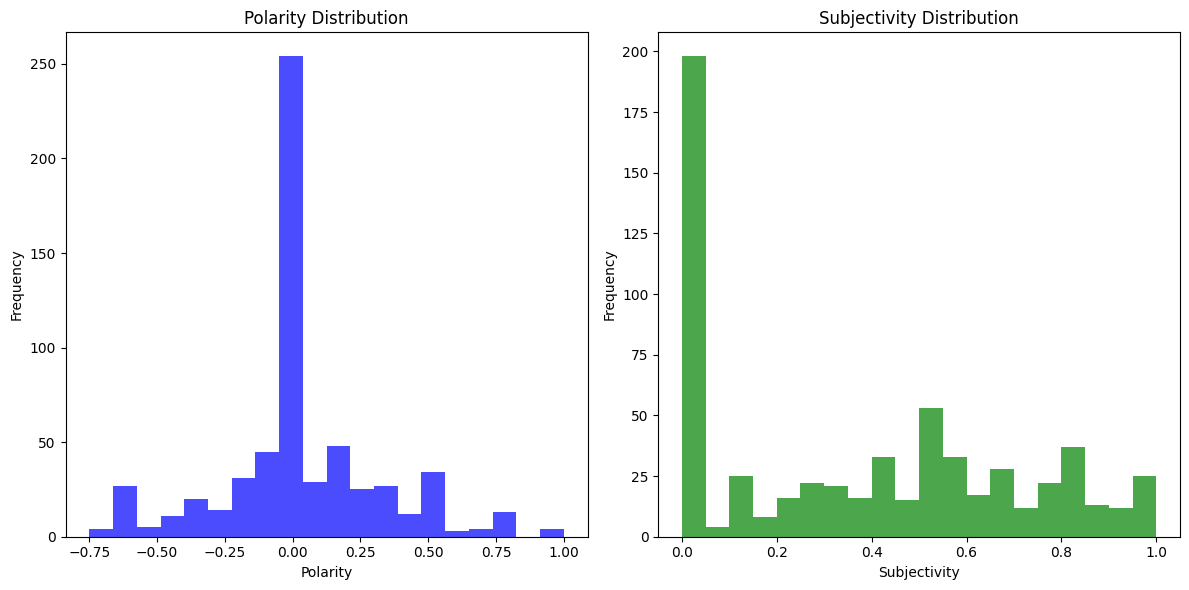

In [5]:
from spacy.tokens import Span, Doc
# List the scores of every sentence in the article
sentences = list(doc.sents)

# Manually define the extensions (what SpacyTextBlob usually does under the hood) for sentences
Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity, force=True)
Doc.set_extension("subjectivity", getter=lambda doc: TextBlob(doc.text).sentiment.subjectivity, force=True)

# ✅ Now register for individual sentences (Span)
Span.set_extension("polarity", getter=lambda span: TextBlob(span.text).sentiment.polarity, force=True)
Span.set_extension("subjectivity", getter=lambda span: TextBlob(span.text).sentiment.subjectivity, force=True)


# Get sentence scores
sentence_scores = [(sent.text, sent._.polarity, sent._.subjectivity) for sent in sentences]
print("\nSentence Scores:")
for sent, polarity, subjectivity in sentence_scores:
    print(f"Sentence: '{sent.strip()}', Polarity: {polarity}, Subjectivity: {subjectivity}")

# plot the sentence scores in a histogram
import matplotlib.pyplot as plt
def plot_sentence_scores(sentence_scores):
    polarities = [score[1] for score in sentence_scores]
    subjectivities = [score[2] for score in sentence_scores]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(polarities, bins=20, color='blue', alpha=0.7)
    plt.title('Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(subjectivities, bins=20, color='green', alpha=0.7)
    plt.title('Subjectivity Distribution')
    plt.xlabel('Subjectivity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
plot_sentence_scores(sentence_scores)



##### Based on the histogram, the polarity scores are mostly centered around 0, but that is expected for a text that contained html snippets. The subjectivity scores also peaked around 0, but had a wider distribution, indicating a mix of objective and subjective sentences.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


Lemma-based Sentence Scores:
Sentence: 'The Maine, the Myth, and the Legend of Cooper Flagg - The Ringer
                                        :root {
                                        --font-gt-america: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'gtAmerica_ce3cd8', '__gtAmerica_Fallback_ce3cd8';
                                        --font-bradford: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'bradford_82a743', '__bradford_Fallback_82a743';
                                        --font-flood: "flood-std", sans-serif;
                                        --font-gt-america-expanded: '__gtAmericaExpanded_999689', '__gtAmericaExpanded_Fallback_999689';
                                        }', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'DiscoveranythingDiscoveranythingVideosPodcastsThe LatestThe LatestFantasy Football RankingsFantasy Football RankingsNBANBANFLNFLThe Fantastic FourThe Fantastic FourTVTVMoviesMoviesMLBMLBEventsEventsThe Streaming GuideThe Streami

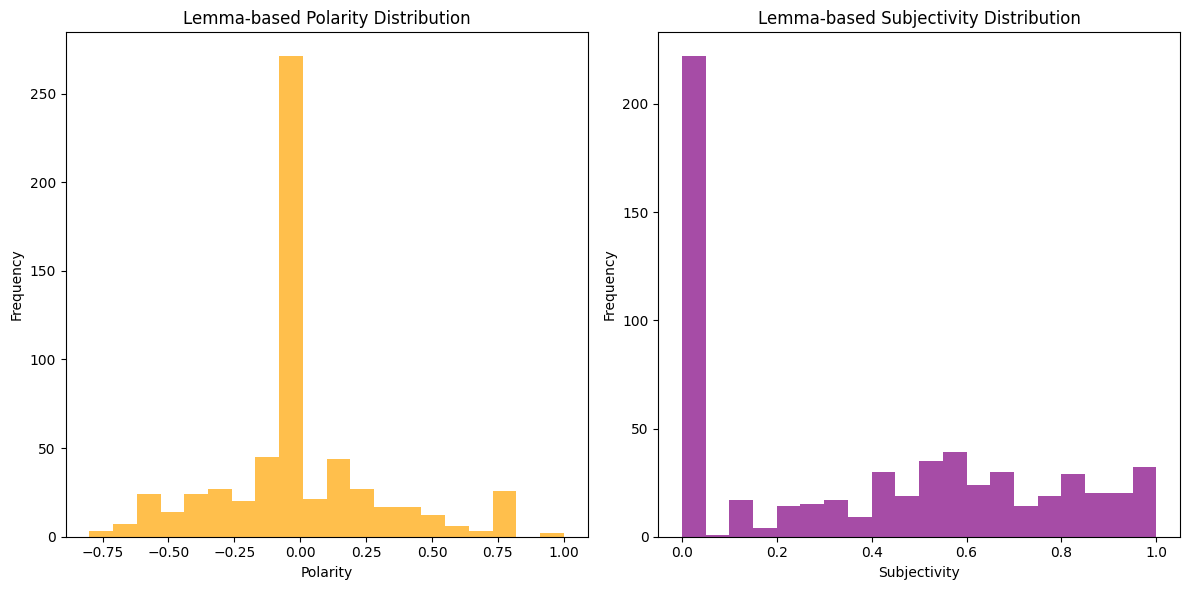

In [6]:
# Get lemma-based polarity and subjectivity scores for every sentence
lemma_sentence_scores = []
for sent in doc.sents:
    lemmas = ' '.join([token.lemma_ for token in sent if not token.is_punct and not token.is_space and not token.is_stop])
    polarity = TextBlob(lemmas).sentiment.polarity
    subjectivity = TextBlob(lemmas).sentiment.subjectivity
    lemma_sentence_scores.append((sent.text, polarity, subjectivity))

# Print lemma-based sentence scores
print("\nLemma-based Sentence Scores:")
for sent, polarity, subjectivity in lemma_sentence_scores:
    print(f"Sentence: '{sent.strip()}', Polarity: {polarity}, Subjectivity: {subjectivity}")

# Plot histogram of lemma-based sentence scores
def plot_lemma_sentence_scores(lemma_sentence_scores):
    polarities = [score[1] for score in lemma_sentence_scores]
    subjectivities = [score[2] for score in lemma_sentence_scores]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(polarities, bins=20, color='orange', alpha=0.7)
    plt.title('Lemma-based Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(subjectivities, bins=20, color='purple', alpha=0.7)
    plt.title('Lemma-based Subjectivity Distribution')
    plt.xlabel('Subjectivity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_lemma_sentence_scores(lemma_sentence_scores)

##### The most common lemma scores in both polarity and subjectivity peaked at 0, due to the inclusion of html and code snippets in the text analyzed. However, both had a wide distribtution in general beyond the 0 lines, suggesting a range of subjectivity and polarity in the text.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [7]:
# Calculate the median polarity for token-based and lemma-based sentence scores
token_polarities = [score[1] for score in sentence_scores]
lemma_polarities = [score[1] for score in lemma_sentence_scores]

# The cutoff should be the median (so fewer than half are above it)
token_cutoff = np.median(token_polarities)
lemma_cutoff = np.median(lemma_polarities)

print(f"Cutoff Score (tokens): {token_cutoff}")
print(f"Cutoff Score (lemmas): {lemma_cutoff}")

# Filter sentences based on the cutoff scores
def filter_sentences_by_cutoff(sentence_scores, cutoff):
    return [sent for sent in sentence_scores if sent[1] >= cutoff]
filtered_token_sentences = filter_sentences_by_cutoff(sentence_scores, token_cutoff)
filtered_lemma_sentences = filter_sentences_by_cutoff(lemma_sentence_scores, lemma_cutoff)

print("\nFiltered Token Sentences (above cutoff):")
for sent in filtered_token_sentences:
    print(f"Sentence: '{sent[0].strip()}', Polarity: {sent[1]}, Subjectivity: {sent[2]}")
print("\nFiltered Lemma Sentences (above cutoff):")
for sent in filtered_lemma_sentences:
    print(f"Sentence: '{sent[0].strip()}', Polarity: {sent[1]}, Subjectivity: {sent[2]}")

Cutoff Score (tokens): 0.0
Cutoff Score (lemmas): 0.0

Filtered Token Sentences (above cutoff):
Sentence: 'The Maine, the Myth, and the Legend of Cooper Flagg - The Ringer
                                        :root {
                                        --font-gt-america: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'gtAmerica_ce3cd8', '__gtAmerica_Fallback_ce3cd8';
                                        --font-bradford: '__', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'bradford_82a743', '__bradford_Fallback_82a743';
                                        --font-flood: "flood-std", sans-serif;
                                        --font-gt-america-expanded: '__gtAmericaExpanded_999689', '__gtAmericaExpanded_Fallback_999689';
                                        }', Polarity: 0.0, Subjectivity: 0.0
Sentence: 'DiscoveranythingDiscoveranythingVideosPodcastsThe LatestThe LatestFantasy Football RankingsFantasy Football RankingsNBANBANFLNFLThe Fantastic FourThe Fantastic Fo

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [8]:
import numpy as np

# Create token polarities
token_polarities = [score[1] for score in sentence_scores]

# Compute median cutoff
token_cutoff = np.median(token_polarities)

# Filter function
def filter_sentences_by_cutoff(sentence_scores, cutoff):
    return [sent[0].strip() for sent in sentence_scores if sent[1] >= cutoff]

# Get summaries
filtered_token_sentences = filter_sentences_by_cutoff(sentence_scores, token_cutoff)


# Format output
print("\n📝 Token-Based Summary:\n")
print(' '.join(filtered_token_sentences))



📝 Token-Based Summary:

The Maine, the Myth, and the Legend of Cooper Flagg - The Ringer
                                        :root {
                                        --font-gt-america: '__ gtAmerica_ce3cd8', '__gtAmerica_Fallback_ce3cd8';
                                        --font-bradford: '__ bradford_82a743', '__bradford_Fallback_82a743';
                                        --font-flood: "flood-std", sans-serif;
                                        --font-gt-america-expanded: '__gtAmericaExpanded_999689', '__gtAmericaExpanded_Fallback_999689';
                                        } DiscoveranythingDiscoveranythingVideosPodcastsThe LatestThe LatestFantasy Football RankingsFantasy Football RankingsNBANBANFLNFLThe Fantastic FourThe Fantastic FourTVTVMoviesMoviesMLBMLBEventsEventsThe Streaming GuideThe Streaming GuideSoccerSoccerMusicMusicSimmons PodSimmons PodRewatchablesRewatchablesNBA Top 100NBA Top 100Big PictureBig PictureRussillo PodRussillo PodThe WatchT

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [9]:
# print the polarity score of the summary generated above
summary_polarity = sum(score[1] for score in sentence_scores if score[1] > 0.0)
print("Polarity score of the summary:", summary_polarity)

Polarity score of the summary: 67.0119902042402


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [10]:
# create lemma polarities
lemma_polarities = [score[1] for score in lemma_sentence_scores]

# Compute median for lemma polarities
lemma_cutoff = np.median(lemma_polarities)

# Filter function
def filter_sentences_by_cutoff(sentence_scores, cutoff):
    return [sent[0].strip() for sent in sentence_scores if sent[1] >= cutoff]

filtered_lemma_sentences = filter_sentences_by_cutoff(lemma_sentence_scores, lemma_cutoff)

print("\n Lemma-Based Summary:\n")
print(' '.join(filtered_lemma_sentences))


 Lemma-Based Summary:

The Maine, the Myth, and the Legend of Cooper Flagg - The Ringer
                                        :root {
                                        --font-gt-america: '__ gtAmerica_ce3cd8', '__gtAmerica_Fallback_ce3cd8';
                                        --font-bradford: '__ bradford_82a743', '__bradford_Fallback_82a743';
                                        --font-flood: "flood-std", sans-serif;
                                        --font-gt-america-expanded: '__gtAmericaExpanded_999689', '__gtAmericaExpanded_Fallback_999689';
                                        } DiscoveranythingDiscoveranythingVideosPodcastsThe LatestThe LatestFantasy Football RankingsFantasy Football RankingsNBANBANFLNFLThe Fantastic FourThe Fantastic FourTVTVMoviesMoviesMLBMLBEventsEventsThe Streaming GuideThe Streaming GuideSoccerSoccerMusicMusicSimmons PodSimmons PodRewatchablesRewatchablesNBA Top 100NBA Top 100Big PictureBig PictureRussillo PodRussillo PodThe WatchTh

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [11]:
summary_lemma_polarity = sum(score[1] for score in lemma_sentence_scores if score[1] > 0.0)

# print the polarity scores of the summary generated with the lemmas
print("\n Lemma-Based Summary Polarity Score:")
print("Overall Polarity Score:", summary_lemma_polarity)

# print the number of sentences in the summary
print("Number of Sentences in Summary:", len(lemma_sentence_scores))


 Lemma-Based Summary Polarity Score:
Overall Polarity Score: 59.54864890160345
Number of Sentences in Summary: 610


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

##### There is a substantial positive shift in polarity scores between the original article's average polarity and the score seen for the summary of the article. I believe this has everything to do with the stripping of HTML and other non-story text from the original article's text for the summary, which had previously been included and analyzed in the original sentiment analysis of the whole article.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

##### I think the summary is clearly closer to the original article by virtue of excluding in its analysis the extraneous HTML and code and/or metadata-related snippets of text. 